In [238]:
import warnings
#warnings.filterwarnings('ignore')

import sys, os
import importlib.util 

spec = importlib.util.spec_from_file_location("tradetestlib","C:\\Users\\JB\\Desktop\\Alpha\\Repositories\\Modules\\Generic\\TradeTestLib\\tradetestlib\\__init__.py")
tradetestlib = importlib.util.module_from_spec(spec)
sys.modules['tradetestlib'] = tradetestlib
spec.loader.exec_module(tradetestlib)


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib
from datetime import datetime as dt, timedelta 
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.stattools import coint 
from scipy.stats import t 
#import tradetestlib
from tqdm import tqdm 
import MetaTrader5 as mt5

import random 
from mean_reversion import Mean_Reversion
from itertools import product

In [420]:


def get_data(how = 'symbol', symbol = None):
    
    folder = 'history'
    
    if how == 'symbol':
        path = f"{folder}/{symbol}/{symbol}_m5.csv"
    
    elif how == 'random':
        
        files = os.listdir(folder)
        index = random.randint(0, len(files) - 1)
        sub_folder = f"{folder}/{files[index]}"
        path = f"{sub_folder}/{os.listdir(sub_folder)[0]}"

    else:
        return None

    df = pd.read_csv(path, index_col='time')
    df = df[['open','high','low','close']]
    df.index = pd.to_datetime(df.index)
    
    return df

def get_mt5_data(symbol):
    mt5_data = tradetestlib.MT5_Data()
    
    start_date = dt(2018, 1, 1)
    end_date = dt(2023, 12, 31)
    return mt5_data.request_price_data(symbol, tf, 'range', start_date = start_date, end_date = end_date)

sym_1 = 'GBPCHF'
sym_2 = 'USDCAD'
tf = 'm15'
df_1, df_2 = get_mt5_data(sym_1), get_mt5_data(sym_2)

df_1.columns = [f'{sym_1}_{c.lower()}' for c in df_1.columns]
df_2.columns = [f'{sym_2}_{c.lower()}' for c in df_2.columns]

In [442]:
#mt5_data = tradetestlib.MT5_Data()




#dataset = pd.concat([df_1['Close'], df_2['Close']], axis = 1).dropna()
dataset = pd.concat([df_1, df_2], axis = 1)
#dataset.columns = [f'{sym_1}_close',f'{sym_2}_close']
dataset[f'{sym_1}_returns'] = dataset[f'{sym_1}_close'].diff(1)
dataset[f'{sym_2}_returns'] = dataset[f'{sym_2}_close'].diff(1)
dataset['combined_returns'] = dataset[f'{sym_1}_returns'] + dataset[f'{sym_2}_returns']
dataset[f'{sym_1}_cumm_returns'] = dataset[f'{sym_1}_returns'].cumsum() 
dataset[f'{sym_2}_cumm_returns'] = dataset[f'{sym_2}_returns'].cumsum()
dataset['combined_cumm_returns'] = dataset['combined_returns'].cumsum()

dataset = dataset.dropna()
dataset

,GBPCHF_open,GBPCHF_high,GBPCHF_low,GBPCHF_close,GBPCHF_spread,USDCAD_open,USDCAD_high,USDCAD_low,USDCAD_close,USDCAD_spread,GBPCHF_returns,USDCAD_returns,combined_returns,GBPCHF_cumm_returns,USDCAD_cumm_returns,combined_cumm_returns
Date,,,,,,,,,,,,,,,,
2018-01-02 00:15:00,1.31565,1.31579,1.31525,1.31561,306.0,1.25419,1.25449,1.25402,1.25418,100.0,-0.00001,-0.00021,-0.00022,-0.00001,-0.00021,-0.00022
2018-01-02 00:30:00,1.31561,1.31596,1.31341,1.31516,304.0,1.25418,1.25430,1.25410,1.25423,91.0,-0.00045,0.00005,-0.00040,-0.00046,-0.00016,-0.00062
2018-01-02 00:45:00,1.31518,1.31618,1.31486,1.31578,255.0,1.25423,1.25517,1.25422,1.25517,20.0,0.00062,0.00094,0.00156,0.00016,0.00078,0.00094
2018-01-02 01:00:00,1.31578,1.31644,1.31421,1.31616,104.0,1.25518,1.25590,1.25489,1.25562,7.0,0.00038,0.00045,0.00083,0.00054,0.00123,0.00177
2018-01-02 01:15:00,1.31616,1.31655,1.31554,1.31655,71.0,1.25561,1.25584,1.25550,1.25559,3.0,0.00039,-0.00003,0.00036,0.00093,0.00120,0.00213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 22:45:00,1.07275,1.07277,1.07197,1.07219,0.0,1.32343,1.32506,1.32329,1.32491,0.0,-0.00057,0.00145,0.00088,-0.24073,0.07054,-0.16977
2023-12-29 23:00:00,1.07218,1.07221,1.07144,1.07144,8.0,1.32492,1.32550,1.32487,1.32550,0.0,-0.00075,0.00059,-0.00016,-0.24148,0.07113,-0.16993
2023-12-29 23:15:00,1.07144,1.07183,1.07138,1.07174,12.0,1.32550,1.32550,1.32494,1.32531,0.0,0.00030,-0.00019,0.00011,-0.24118,0.07094,-0.16982


<Axes: xlabel='Date'>

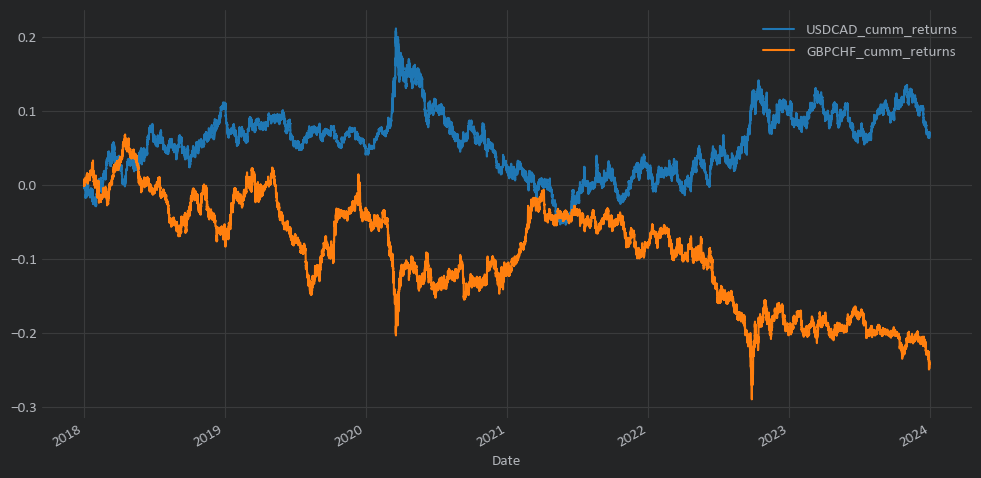

In [422]:
dataset[[f'{sym_2}_cumm_returns', f'{sym_1}_cumm_returns']].plot(figsize= (12, 6))

In [423]:
df_1

,GBPCHF_open,GBPCHF_high,GBPCHF_low,GBPCHF_close,GBPCHF_spread
Date,,,,,
2018-01-02 00:00:00,1.31418,1.31600,1.31290,1.31562,222
2018-01-02 00:15:00,1.31565,1.31579,1.31525,1.31561,306
2018-01-02 00:30:00,1.31561,1.31596,1.31341,1.31516,304
2018-01-02 00:45:00,1.31518,1.31618,1.31486,1.31578,255
2018-01-02 01:00:00,1.31578,1.31644,1.31421,1.31616,104
...,...,...,...,...,...
2023-12-29 22:45:00,1.07275,1.07277,1.07197,1.07219,0
2023-12-29 23:00:00,1.07218,1.07221,1.07144,1.07144,8
2023-12-29 23:15:00,1.07144,1.07183,1.07138,1.07174,12


In [443]:

def build(df, window, spread:str = 'diff', fill = True, signal_thresh: int = 3, invert_base = True, hedge = True):
    # spread: diff or ratio 
    dataset = df.copy()
    dataset = dataset.dropna()

    dataset[f'{sym_1}_position'] = np.nan if fill else 0


    sym1_returns = dataset[f'{sym_1}_cumm_returns']
    sym2_returns = dataset[f'{sym_2}_cumm_returns']

    sym1_close = dataset[f'{sym_1}_close']
    sym2_close = dataset[f'{sym_2}_close']

    dataset['returns_spread'] = sym1_returns - sym2_returns if spread == 'diff' else sym1_close / sym2_close
    # Measuring returns as the difference between close price and moving average
    dataset['spread_rolling_std'] = dataset['returns_spread'].rolling(window).std()
    dataset['spread_rolling_mean'] = dataset['returns_spread'].rolling(window).mean()

    # Z Score - absolute spread
    dataset['normalized_spread'] = (dataset['returns_spread'] - dataset['spread_rolling_mean']) / dataset['spread_rolling_std']
    dataset['normalized_spread'] = dataset['normalized_spread'].shift(1) 

    dataset.loc[dataset['normalized_spread'] > signal_thresh, f'{sym_1}_position'] = -1 if not invert_base else 1
    dataset.loc[dataset['normalized_spread'] < -signal_thresh, f'{sym_1}_position'] = 1 if not invert_base else -1
    dataset[f'{sym_1}_position'] = dataset[f'{sym_1}_position'].ffill()

    dataset[f'{sym_2}_position'] = dataset[f'{sym_1}_position'] if not hedge else dataset[f'{sym_1}_position'] * -1

    dataset['portfolio_returns'] = (dataset[f'{sym_1}_returns'] * dataset[f'{sym_1}_position']) + (dataset[f'{sym_2}_returns'] * dataset[f'{sym_2}_position'])


    dataset = dataset.dropna()

    return dataset



In [444]:
cols = ['open','high','low','close','position']

sym_1_cols = [f'{sym_1}_{c}' for c in cols]
sym_2_cols = [f'{sym_2}_{c}' for c in cols]


def calc(df, columns):

    sub = df[columns]
    sub.columns = cols

    sub['new_trade'] = 0
    sub.loc[(sub['position'] != sub['position'].shift(-1)), 'new_trade'] = 1
    sub['new_trade'] = sub['new_trade'].shift(1)
    sub = sub.dropna()
    sub['signal'] = (sub['position'] * sub['new_trade']).astype(int)


    sub['close_price'] = np.nan
    sub.loc[(sub['position'] != sub['position'].shift(-1)), 'close_price'] = sub['close']


    sub['close_price'] = sub['close_price'].bfill()
    sub['close_price'] = sub['close_price'] * sub['new_trade']

    new_position_mask = (sub['position'] != sub['position'].shift(-1))

    sub['count'] = sub['new_trade'].cumsum().astype(int)
    lowest = sub.groupby('count')['low'].min().to_dict()
    highest = sub.groupby('count')['high'].max().to_dict()

    sub['lowest'] = sub.loc[sub['signal'] != 0]['count'].map(lowest)
    sub['highest'] = sub.loc[sub['signal'] != 0]['count'].map(highest)

    sub = sub.fillna(0)

    sub['trade_diff'] = (sub['close_price'] - sub['close']) * sub['new_trade'] * sub['position']

    return sub 



In [445]:
def optimize(w, spread, t, invert, hedge):
    d = build(dataset.copy(), window = w, spread = spread, fill = True, signal_thresh = t, invert_base = invert, hedge=hedge)
    train_end = dt(2022, 1, 1)
    c1 = calc(d, sym_1_cols)
    c2 = calc(d, sym_2_cols)

    c1 = c1.loc[c1.index.date < train_end.date()]
    c2 = c2.loc[c2.index.date < train_end.date()]

    total = c1['trade_diff'] + c2['trade_diff']
    net = total.sum()
    return net


In [456]:
def search():
    windows = np.arange(30, 200, 10)
    thresh = np.arange(2, 4, 1)

    param_grid = {
        'windows' : windows, 
        'thresh' : thresh,
        'spread' : ['diff','ratio'],
        'invert' : [True, False],
        'hedge' : [True, False]
    }
    
    data = []
    for w, t, s, i, h in tqdm(product(param_grid['windows'], param_grid['thresh'], param_grid['spread'], param_grid['invert'], param_grid['hedge'])):
        net = optimize(w, s, t, i, h)
        data.append([w, s, t, i, h, net])

    df = pd.DataFrame(data, columns = ['window', 'spread', 'threshold', 'invert', 'hedge', 'net'])
    return df


opt = search()

272it [01:46,  2.54it/s]


In [457]:
best = opt.loc[opt['net'] == opt['net'].max()]
best_window = best['window'].item()
best_threshold = best['threshold'].item()
best_invert = best['invert'].item()
best_hedge = best['hedge'].item()
best

,window,spread,threshold,invert,hedge,net
62,60,ratio,3,False,True,0.54775


In [458]:

d = build(dataset.copy(), window = best_window, fill = True, signal_thresh = best_threshold, invert_base = best_invert, hedge = best_hedge)
sym_main = calc(d, sym_1_cols)
sym_secondary = calc(d, sym_2_cols)

In [459]:
def run_sim(dataset, symbol, tf, lot):
    train_end = dt(2022, 1, 1)
    train = dataset.loc[dataset.index.date < train_end.date()]
    test = dataset.loc[dataset.index.date >= train_end.date()]


    loss = 1
    hold = 1
    mt5.initialize()


    sim = tradetestlib.Simulation(
                    symbol, 
                    tf, 
                    train_raw = train, 
                    test_raw=test, 
                    lot = lot, 
                    starting_balance=100000, 
                    max_loss_pct=loss, 
                    hold_time=hold, 
                    trading_window_start = 1,
                    trading_window_end=23,
                    num_elements = 500,
                    default_figsize=(14,6),
                    trading_type = 'inverting',
                    show_properties = False
                    )
    
    return sim

In [460]:
main_results = run_sim(sym_main, sym_1, tf, 5)
secondary_results = run_sim(sym_secondary, sym_2, tf, 10)

Text(0, 0.5, 'Profit ($)')

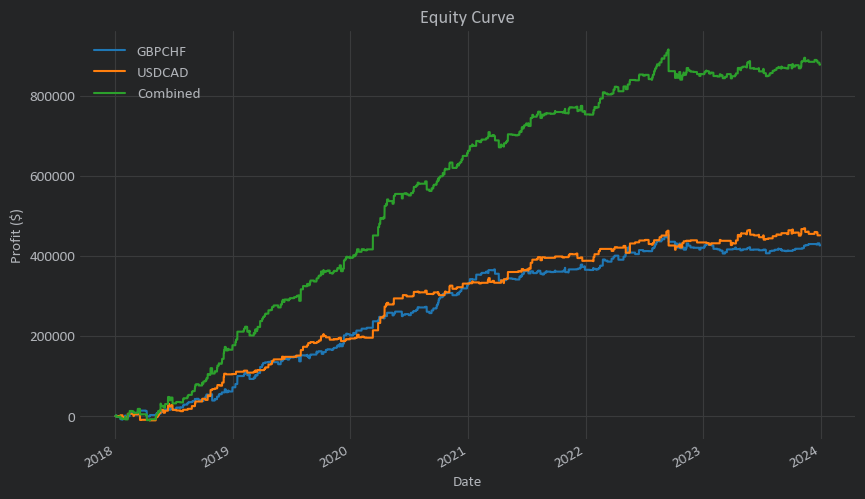

In [464]:
total = pd.concat([main_results.combined_filtered['net_profit'], secondary_results.combined_filtered['net_profit']], axis = 1)
total.columns = [sym_1, sym_2]
total['net_profit'] = total.sum(axis = 1)
total['balance'] = total['net_profit'].cumsum() + 100000
total.drop(['balance'], axis = 1).cumsum().plot(figsize = (10, 6))
plt.legend(labels = ['GBPCHF','USDCAD','Combined'])
plt.title('Equity Curve')
plt.ylabel('Profit ($)')

In [471]:
total[[sym_1, sym_2]].corr()

,GBPCHF,USDCAD
GBPCHF,1.000000,0.168101
USDCAD,0.168101,1.000000


In [467]:
e = tradetestlib.Evaluation()
sharpe = e.annualized_sharpe_ratio(total)
print(f"Annualized Sharpe Ratio: {sharpe:.2f}")

Annualized Sharpe Ratio: 2.40


Text(0.5, 1.0, 'Cumulative Gain By Year')

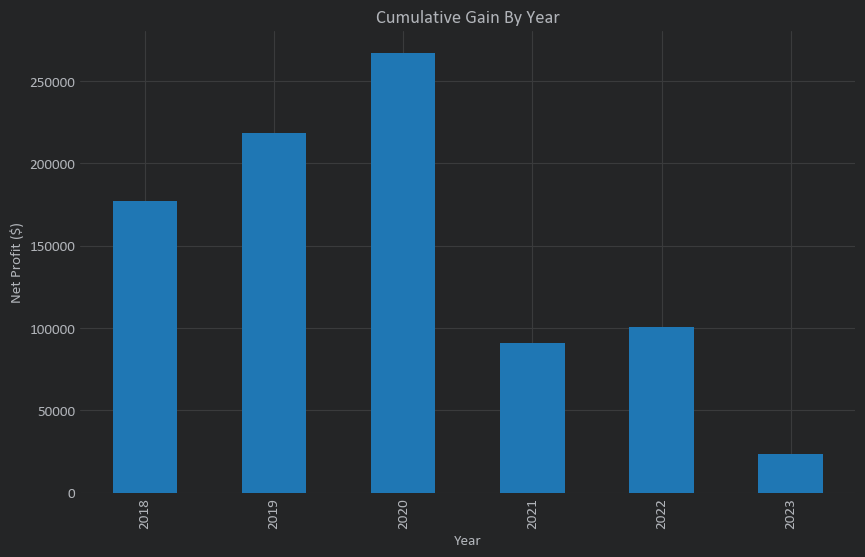

In [470]:
total.groupby(total.index.year)['net_profit'].sum().plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Year')
plt.ylabel('Net Profit ($)')
plt.title('Cumulative Gain By Year')